In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime
import math

In [2]:
Table2425=pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')[0]
Table2425=Table2425[['Rk','Squad']]

In [3]:
df2425=pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')[18]
df2324=pd.read_html('https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats')[18]
df2223=pd.read_html('https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats')[18]
df2122=pd.read_html('https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats')[18]

In [4]:
df2425.columns = ['_'.join(filter(None, col)).strip() for col in df2425.columns]
df2324.columns = ['_'.join(filter(None, col)).strip() for col in df2324.columns]
df2223.columns = ['_'.join(filter(None, col)).strip() for col in df2223.columns]
df2122.columns = ['_'.join(filter(None, col)).strip() for col in df2122.columns]

In [5]:
df2425.rename(columns={'Unnamed: 0_level_0_Squad':'Squad', 'Unnamed: 1_level_0_# Pl':'Pl',
       'Unnamed: 2_level_0_Poss':'Poss', 'Unnamed: 3_level_0_90s':'90s'},inplace=True)
df2324.rename(columns={'Unnamed: 0_level_0_Squad':'Squad', 'Unnamed: 1_level_0_# Pl':'Pl',
       'Unnamed: 2_level_0_Poss':'Poss', 'Unnamed: 3_level_0_90s':'90s'},inplace=True)
df2223.rename(columns={'Unnamed: 0_level_0_Squad':'Squad', 'Unnamed: 1_level_0_# Pl':'Pl',
       'Unnamed: 2_level_0_Poss':'Poss', 'Unnamed: 3_level_0_90s':'90s'},inplace=True)
df2122.rename(columns={'Unnamed: 0_level_0_Squad':'Squad', 'Unnamed: 1_level_0_# Pl':'Pl',
       'Unnamed: 2_level_0_Poss':'Poss', 'Unnamed: 3_level_0_90s':'90s'},inplace=True)

In [6]:
new2425=df2425[['Squad','90s','Touches_Touches','Touches_Def Pen','Touches_Def 3rd','Touches_Mid 3rd','Touches_Att 3rd','Touches_Att Pen']]
new2324=df2324[['Squad','90s','Touches_Touches','Touches_Def Pen','Touches_Def 3rd','Touches_Mid 3rd','Touches_Att 3rd','Touches_Att Pen']]
new2223=df2223[['Squad','90s','Touches_Touches','Touches_Def Pen','Touches_Def 3rd','Touches_Mid 3rd','Touches_Att 3rd','Touches_Att Pen']]
new2122=df2122[['Squad','90s','Touches_Touches','Touches_Def Pen','Touches_Def 3rd','Touches_Mid 3rd','Touches_Att 3rd','Touches_Att Pen']]

In [7]:
for i in new2425.columns.difference(['Squad', '90s']):  # Exclude 'Squad' and '90s' columns
    new2425[f'per_match_{i} 24-25'] = new2425[i] / new2425['90s']
for i in new2324.columns.difference(['Squad', '90s']):  # Exclude 'Squad' and '90s' columns
    new2324[f'per_match_{i} 23-24'] = new2324[i] / new2324['90s']
for i in new2223.columns.difference(['Squad', '90s']):  # Exclude 'Squad' and '90s' columns
    new2223[f'per_match_{i} 22-23'] = new2223[i] / new2223['90s']
for i in new2122.columns.difference(['Squad', '90s']):  # Exclude 'Squad' and '90s' columns
    new2122[f'per_match_{i} 21-22'] = new2122[i] / new2122['90s']
    

/var/folders/w1/v_96k9nn4k73369wp7ddnydw0000gn/T/ipykernel_31075/398051447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2425[f'per_match_{i} 24-25'] = new2425[i] / new2425['90s']
/var/folders/w1/v_96k9nn4k73369wp7ddnydw0000gn/T/ipykernel_31075/398051447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2425[f'per_match_{i} 24-25'] = new2425[i] / new2425['90s']
/var/folders/w1/v_96k9nn4k73369wp7ddnydw0000gn/T/ipykernel_31075/398051447.py:2: SettingWithCopyWarning: 
A value is trying to be set 

In [8]:
new2425=new2425[['Squad','per_match_Touches_Att 3rd 24-25',
       'per_match_Touches_Def 3rd 24-25']]
new2324=new2324[['Squad','per_match_Touches_Att 3rd 23-24',
       'per_match_Touches_Def 3rd 23-24']]
new2223=new2223[['Squad','per_match_Touches_Att 3rd 22-23',
       'per_match_Touches_Def 3rd 22-23']]
new2122=new2122[['Squad','per_match_Touches_Att 3rd 21-22',
       'per_match_Touches_Def 3rd 21-22']]


In [9]:
df=pd.merge(new2425,new2324,on='Squad',how='left')
df=pd.merge(df,new2223,on='Squad',how='left')
df=pd.merge(df,new2122,on='Squad',how='left')


In [10]:
df=pd.merge(df,Table2425,on='Squad')
df=df[df['Rk']<=6]

In [11]:
df

,Squad,per_match_Touches_Att 3rd 24-25,per_match_Touches_Def 3rd 24-25,per_match_Touches_Att 3rd 23-24,per_match_Touches_Def 3rd 23-24,per_match_Touches_Att 3rd 22-23,per_match_Touches_Def 3rd 22-23,per_match_Touches_Att 3rd 21-22,per_match_Touches_Def 3rd 21-22,Rk
0,Arsenal,175.000000,166.000000,225.263158,176.684211,210.921053,174.526316,170.815789,188.184211,4
4,Brighton,159.363636,213.090909,178.052632,248.657895,180.868421,206.421053,171.184211,211.421053,6
5,Chelsea,151.363636,217.363636,172.578947,246.500000,180.263158,222.657895,207.394737,208.578947,3
11,Liverpool,161.909091,213.000000,207.078947,194.473684,188.131579,213.657895,221.552632,189.342105,1
12,Manchester City,329.363636,156.818182,270.000000,184.526316,218.447368,195.000000,256.026316,172.789474,2
15,Nott'ham Forest,150.727273,170.636364,123.315789,193.157895,98.815789,195.263158,NaN,NaN,5


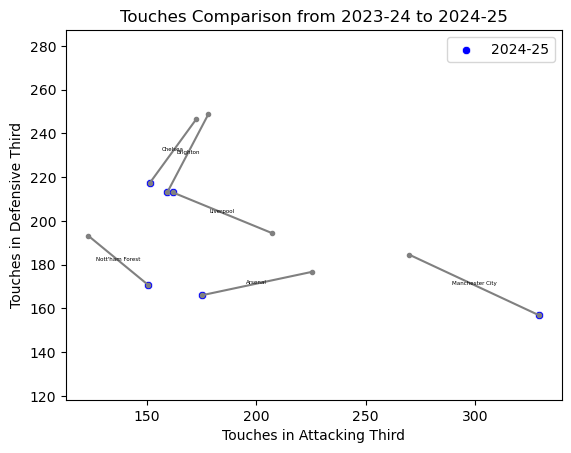

In [12]:

# Create the initial scatter plot for the 3rd_2324 points
sns.scatterplot(data=df, x='per_match_Touches_Att 3rd 24-25', y='per_match_Touches_Def 3rd 24-25', label="2024-25", color="blue")

# Plot lines from each 3rd_2324 point to the corresponding 3rd_2425 point
for i in range(len(df)):
    # Coordinates for the starting point (3rd_2324)
    x_start = df['per_match_Touches_Att 3rd 23-24'].iloc[i]
    y_start = df['per_match_Touches_Def 3rd 23-24'].iloc[i]
    
    # Coordinates for the ending point (3rd_2425)
    x_end = df['per_match_Touches_Att 3rd 24-25'].iloc[i]
    y_end = df['per_match_Touches_Def 3rd 24-25'].iloc[i]
    
    # Plot a line between the two points
    plt.plot([x_start, x_end], [y_start, y_end], color='gray', linestyle='-', marker='o', markersize=3)

    # Add the squad name along the line at the midpoint
    plt.text(
        (x_start + x_end) / 2,  # x-coordinate of the midpoint
        (y_start + y_end) / 2,  # y-coordinate of the midpoint
        df['Squad'].iloc[i],    # text (squad name)
        fontsize=4,             # adjust font size as needed
        ha='center'              # horizontal alignment
    )

# Make axes equal
plt.axis('equal')
plt.xlabel("Touches in Attacking Third")
plt.ylabel("Touches in Defensive Third")
plt.title("Touches Comparison from 2023-24 to 2024-25")

plt.show()


In [13]:
df.Squad.to_list()
# Example dictionary linking squad names to logo file paths
squad_logos = {
    'Arsenal':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Arsenal FC.png',
    'Aston Villa': '/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Aston Villa.png',
    'Bournemouth':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/AFC Bournemouth.png',
    'Brentford':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Brentford FC.png',
    'Brighton':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Brighton & Hove Albion.png',
    'Chelsea':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Chelsea FC.png',
    'Crystal Palace':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Crystal Palace.png',
    'Everton':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Everton FC.png',
    'Fulham':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Fulham FC.png',
    'Liverpool':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Liverpool FC.png',
    'Manchester City':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Manchester City.png',
    'Manchester Utd':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Manchester United.png',
    'Newcastle Utd':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Newcastle United.png',
    "Nott'ham Forest":'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Nottingham Forest.png',
    'Tottenham':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Tottenham Hotspur.png',
    'West Ham':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/West Ham United.png',
    'Wolves':'/Users/preciousprince/Downloads/football-logos-master/logos/England - Premier League/Wolverhampton Wanderers.png'
}

In [14]:
df

,Squad,per_match_Touches_Att 3rd 24-25,per_match_Touches_Def 3rd 24-25,per_match_Touches_Att 3rd 23-24,per_match_Touches_Def 3rd 23-24,per_match_Touches_Att 3rd 22-23,per_match_Touches_Def 3rd 22-23,per_match_Touches_Att 3rd 21-22,per_match_Touches_Def 3rd 21-22,Rk
0,Arsenal,175.000000,166.000000,225.263158,176.684211,210.921053,174.526316,170.815789,188.184211,4
4,Brighton,159.363636,213.090909,178.052632,248.657895,180.868421,206.421053,171.184211,211.421053,6
5,Chelsea,151.363636,217.363636,172.578947,246.500000,180.263158,222.657895,207.394737,208.578947,3
11,Liverpool,161.909091,213.000000,207.078947,194.473684,188.131579,213.657895,221.552632,189.342105,1
12,Manchester City,329.363636,156.818182,270.000000,184.526316,218.447368,195.000000,256.026316,172.789474,2
15,Nott'ham Forest,150.727273,170.636364,123.315789,193.157895,98.815789,195.263158,NaN,NaN,5


In [ ]:
# Set dark background style and figure size
plt.style.use("dark_background")
plt.figure(figsize=(12, 8))

# Scatter plot for the 2024-25 points
sns.scatterplot(data=df, x='per_match_Touches_Att 3rd 24-25', y='per_match_Touches_Def 3rd 24-25', label="2024-25", color="yellow", s=800, zorder=5)
sns.scatterplot(data=df, x='per_match_Touches_Att 3rd 23-24', y='per_match_Touches_Def 3rd 23-24', label="2023-24", color="white", s=800, zorder=5)

# Plot comet lines and logos for each squad
for i in range(len(df)):
    # Coordinates for starting and ending points
    x_start = df['per_match_Touches_Att 3rd 23-24'].iloc[i]
    y_start = df['per_match_Touches_Def 3rd 23-24'].iloc[i]
    x_end = df['per_match_Touches_Att 3rd 24-25'].iloc[i]
    y_end = df['per_match_Touches_Def 3rd 24-25'].iloc[i]
    squad_name = df['Squad'].iloc[i]
    
    # Create a thicker comet line with a fade effect
    n_points = 10  # Number of line segments for the fade effect
    for j in range(n_points):
        
        alpha = j / n_points
        plt.plot(
            [x_start + (x_end - x_start) * j / n_points, x_start + (x_end - x_start) * (j + 1) / n_points],
            [y_start + (y_end - y_start) * j / n_points, y_start + (y_end - y_start) * (j + 1) / n_points],
            color='white', linewidth=15, alpha=1 # Thicker line for better visibility
        )
    
    # Plot a larger end dot
    plt.scatter(x_end, y_end, color='yellow', s=600, zorder=5)  # Larger marker at end point
    plt.scatter(x_start, y_start, color='white', s=450, zorder=5)
    # Add the squad logo at the end point on top of the dot
    if squad_name in squad_logos:
        logo_path = squad_logos[squad_name]
        logo_img = mpimg.imread(logo_path)
        imagebox = OffsetImage(logo_img, zoom=.13, alpha=1, interpolation='nearest')  # Adjust zoom, alpha, and interpolation
        ab = AnnotationBbox(imagebox, (x_end, y_end), frameon=False, zorder=6)
        plt.gca().add_artist(ab)

# Customize axis, grid, labels, and titles
plt.axis('equal')
plt.xlabel("Touches in Attacking Third per Match", fontsize=12, color="white", fontname="Georgia")
plt.ylabel("Touches in Defensive Third per Match", fontsize=12, color="white", fontname="Georgia")
plt.title("Premier League Touches Comparison b/w 23-24 & 24-25 Season", fontsize=30, color="white", weight="bold", pad=15, fontname="Georgia")

# Adding date and source text at the bottom
today = datetime.today()
formatted_date = today.strftime("%d %B %Y")
plt.text(0.9, -0.15, f"Premier League | {formatted_date}", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.9, -0.2, "Source: fbref.com ", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.1, -0.2, "Bun facts by PP33", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")

# Customize grid and axis style to match the theme
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=1, which='both')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')


plt.savefig(r"/Users/preciousprince/Downloads/plot_with_logos1.png", dpi=800, bbox_inches='tight')  # Save at 300 DPI or higher
plt.show()

In [ ]:

# Set dark background style and figure size
plt.style.use("dark_background")
plt.figure(figsize=(12, 8))

for i in range(len(df)):
    # Coordinates for starting and ending points
    x_start = df['per_match_Touches_Att 3rd 23-24'].iloc[i]
    y_start = df['per_match_Touches_Def 3rd 23-24'].iloc[i]
    x_end = df['per_match_Touches_Att 3rd 24-25'].iloc[i]
    y_end = df['per_match_Touches_Def 3rd 24-25'].iloc[i]
    squad_name = df['Squad'].iloc[i]
    
    # Create a thicker comet line with a fade effect
    n_points = int(math.sqrt((x_end - x_start)**2 + (y_end - y_start)**2))# Number of line segments for the fade effect
    for j in range(n_points):
       
        # Calculate position for each faded dot along the line
        x = x_start + (x_end - x_start) * j / (n_points - 1)
        y = y_start + (y_end - y_start) * j / (n_points - 1)
        
        # Set the alpha for fading effect
        alpha = j / n_points
        
        # Plot each point as a circular dot with fading effect
        plt.scatter(x, y, color='white', s=10*j, alpha=alpha, zorder=3)
        
    # Add the squad logo at the end point on top of the dot
    if squad_name in squad_logos:
        logo_path = squad_logos[squad_name]
        logo_img = mpimg.imread(logo_path)
        imagebox = OffsetImage(logo_img, zoom=.13, alpha=1)  # Adjust zoom, alpha, and interpolation
        ab = AnnotationBbox(imagebox, (x_end, y_end), frameon=False, zorder=6)
        plt.gca().add_artist(ab)

# Customize axis, grid, labels, and titles
plt.axis('equal')

plt.xlabel("Touches in Attacking Third per Match", fontsize=12, color="white", fontname="Georgia")
plt.ylabel("Touches in Defensive Third per Match", fontsize=12, color="white", fontname="Georgia")
plt.title("Premier League Touches Comparison b/w 23-24 & 24-25 Season", fontsize=30, color="white", weight="bold", pad=15, fontname="Georgia")

# Adding date and source text at the bottom
today = datetime.today()
formatted_date = today.strftime("%d %B %Y")
plt.text(0.9, -0.15, f"Premier League | {formatted_date}", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.9, -0.2, "Source: fbref.com ", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.1, -0.2, "Bun facts by PP33", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")

# Customize grid and axis style to match the theme
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5, which='both')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
#plt.gca().spines['left'].set_color('gray')
#plt.gca().spines['bottom'].set_color('gray')

# Ensure that logos appear clearly and the background doesn't overpower them
plt.savefig(r"/Users/preciousprince/Downloads/plot_with_logos2.png", dpi=300, bbox_inches='tight')  # Save at 300 DPI or higher
plt.show()


In [ ]:
df_att=df[['Squad','per_match_Touches_Att 3rd 24-25','per_match_Touches_Att 3rd 23-24','per_match_Touches_Att 3rd 22-23',
           'per_match_Touches_Att 3rd 21-22']]
# Rename columns to have consistent season labels for better plotting
df_att = df_att.rename(columns={
    'per_match_Touches_Att 3rd 24-25': '2024-25',
    'per_match_Touches_Att 3rd 23-24': '2023-24',
    'per_match_Touches_Att 3rd 22-23': '2022-23',
    'per_match_Touches_Att 3rd 21-22': '2021-22'
})
plt.style.use("dark_background")
# Convert data to long format for easier line plotting
df_att_long = df_att.melt(id_vars=['Squad'], 
                  value_vars=[ '2021-22', '2022-23', '2023-24','2024-25'], 
                  var_name='Season', 
                  value_name='Touches_per_Match')

plt.figure(figsize=(12, 8))

# Plot each squad's touches as a line across seasons
sns.lineplot(data=df_att_long, x='Season', y='Touches_per_Match', hue='Squad', marker='.', legend=None,linewidth=4)

# Customize plot aesthetics
plt.title('Per Match Touches in Attacking Third Across Seasons', fontsize=16, weight='bold', fontname="Georgia")
plt.xlabel('Season', fontsize=14, fontname="Georgia")
plt.ylabel('Touches per Match in Attacking Third', fontsize=14, fontname="Georgia")
plt.xticks(rotation=45)

# Loop over each data point to add logos
for i in range(len(df_att_long)):
    squad = df_att_long.iloc[i]['Squad']
    season = df_att_long.iloc[i]['Season']
    touches = df_att_long.iloc[i]['Touches_per_Match']
    
    if squad in squad_logos:
        # Load the image
        logo_path = squad_logos[squad]
        logo_img = mpimg.imread(logo_path)
        
        # Create an image box with the squad logo
        imagebox = OffsetImage(logo_img, zoom=0.15)  # Adjust zoom for appropriate logo size
        
        # Position the logo at each data point
        ab = AnnotationBbox(imagebox, (season, touches), frameon=False, box_alignment=(0.5, 0.5), zorder=5)
        plt.gca().add_artist(ab)
# Adding date and source text at the bottom
today = datetime.today()
formatted_date = today.strftime("%d %B %Y")
plt.text(0.9, -0.15, f"Premier League | {formatted_date}", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.9, -0.2, "Source: fbref.com ", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.1, -0.2, "Bun facts by PP33", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Tight layout to ensure everything fits
plt.tight_layout()
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5, which='both')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
# Show plot

plt.savefig(r"/Users/preciousprince/Downloads/plot_with_logos3.png", dpi=300, bbox_inches='tight')  # Save at 300 DPI or higher
plt.show()

In [ ]:
df_def=df[['Squad','per_match_Touches_Def 3rd 24-25','per_match_Touches_Def 3rd 23-24','per_match_Touches_Def 3rd 22-23',
           'per_match_Touches_Def 3rd 21-22']]
# Rename columns to have consistent season labels for better plotting
df_def = df_def.rename(columns={
    'per_match_Touches_Def 3rd 24-25': '2024-25',
    'per_match_Touches_Def 3rd 23-24': '2023-24',
    'per_match_Touches_Def 3rd 22-23': '2022-23',
    'per_match_Touches_Def 3rd 21-22': '2021-22'
})
plt.style.use("dark_background")
# Convert data to long format for easier line plotting
df_def_long = df_def.melt(id_vars=['Squad'], 
                  value_vars=[ '2021-22', '2022-23', '2023-24','2024-25'], 
                  var_name='Season', 
                  value_name='Touches_per_Match')

plt.figure(figsize=(12, 8))

# Plot each squad's touches as a line across seasons
sns.lineplot(data=df_def_long, x='Season', y='Touches_per_Match', hue='Squad', marker='.', legend=None,linewidth=4)

# Customize plot aesthetics
plt.title('Per Match Touches in Defensive Third Across Seasons', fontsize=16, weight='bold', fontname="Georgia")
plt.xlabel('Season', fontsize=14, fontname="Georgia")
plt.ylabel('Touches per Match in Defensive Third', fontsize=14, fontname="Georgia")
plt.xticks(rotation=45)

# Loop over each data point to add logos
for i in range(len(df_def_long)):
    squad = df_def_long.iloc[i]['Squad']
    season = df_def_long.iloc[i]['Season']
    touches = df_def_long.iloc[i]['Touches_per_Match']
    
    if squad in squad_logos:
        # Load the image
        logo_path = squad_logos[squad]
        logo_img = mpimg.imread(logo_path)
        
        # Create an image box with the squad logo
        imagebox = OffsetImage(logo_img, zoom=0.15)  # Adjust zoom for appropriate logo size
        
        # Position the logo at each data point
        ab = AnnotationBbox(imagebox, (season, touches), frameon=False, box_alignment=(0.5, 0.5), zorder=5)
        plt.gca().add_artist(ab)
# Adding date and source text at the bottom
today = datetime.today()
formatted_date = today.strftime("%d %B %Y")
plt.text(0.9, -0.15, f"Premier League | {formatted_date}", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.9, -0.2, "Source: fbref.com ", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.1, -0.2, "Bun facts by PP33", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Tight layout to ensure everything fits
plt.tight_layout()
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5, which='both')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
# Show plot

plt.savefig(r"/Users/preciousprince/Downloads/plot_with_logos4.png", dpi=300, bbox_inches='tight')  # Save at 300 DPI or higher
plt.show()